<a href="https://colab.research.google.com/github/Ruchintha-Dias/DSPL-ICW/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Exploration

In [218]:
# Import libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import preprocessing
import plotly.subplots as sp
import plotly.graph_objects as go

This code imports essential libraries for data manipulation (pandas), visualization (plotly.express, matplotlib.pyplot, seaborn, plotly.graph_objects, plotly.subplots), regular expressions (re), and machine learning preprocessing (sklearn.preprocessing).

In [219]:
# load traincsv dataset
import pandas as pd
df = pd.read_csv("/content/National Transport Report Tables — 2020_2021 - Inter Provincial Bus Routes – Normal Buses (As at May 2017).csv")
df.head()

,Serial Number,Route No.,Origin,Destination,No of Busses (Normal),Operated Buses Per Day,Distance (Km),No of Trip Per Day (Both Side),Operated(KM) per day,Travel Time (hours)
0,1,1,COLOMBO,KANDY,98,75,115.2,150,17280.0,3:30
1,2,1 - 1,COLOMBO,KEGALLE,33,31,77.3,80,6184.0,2:20
2,3,1 - 1/245,KEGALLE,NEGOMBO,1,1,74.0,4,296.0,1:55
3,4,1 - 2,COLOMBO,MAWANELLA,12,12,90.0,48,4320.0,2:40
4,5,1 - 3,COLOMBO,WARAKAPOLA,2,2,56.2,4,224.8,1:50


This code load the traincsv.csv file into a Pandas DataFrame and displyas its first five rows.


In [220]:
# Identify dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Serial Number                   303 non-null    int64  
 1   Route No.                       303 non-null    object 
 2   Origin                          303 non-null    object 
 3   Destination                     303 non-null    object 
 4   No of Busses (Normal)           303 non-null    int64  
 5   Operated Buses Per Day          303 non-null    int64  
 6   Distance (Km)                   303 non-null    float64
 7   No of Trip Per Day (Both Side)  303 non-null    int64  
 8   Operated(KM) per day            303 non-null    float64
 9   Travel Time (hours)             301 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 23.8+ KB


This code gives summery over the dataset such as number of entires, columns, non null count and data type for each column.

In [221]:
# List down dataset columns
list(df.columns)

['Serial Number',
 'Route No.',
 'Origin',
 'Destination',
 'No of Busses (Normal)',
 'Operated Buses Per Day',
 'Distance (Km)',
 'No of Trip Per Day (Both Side)',
 'Operated(KM) per day',
 'Travel Time (hours)']

This code give the list of columns in the dataset.

In [222]:
# Get dataset dimmentions
shape_before_preprocessing = df.shape
shape_before_preprocessing

(303, 10)

The code shows the dimentions of the dataset before the prepossing.



In [223]:
#Get summery statistics for numerics
df.describe()

,Serial Number,No of Busses (Normal),Operated Buses Per Day,Distance (Km),No of Trip Per Day (Both Side),Operated(KM) per day
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,6.749175,6.079208,157.062046,14.993399,1544.622112
std,87.612784,13.289310,11.415410,86.145681,28.733878,2774.220191
min,1.000000,1.000000,1.000000,12.200000,1.000000,10.000000
25%,76.500000,1.000000,1.000000,93.750000,2.000000,304.300000
50%,152.000000,2.000000,2.000000,148.300000,4.000000,512.000000
75%,227.500000,4.000000,4.000000,206.300000,10.000000,1143.400000
max,303.000000,98.000000,76.000000,448.500000,202.000000,23418.400000


Get summery statistics for values that are idetified by the python as numerics.

In [224]:
#Getting summery statistics for objects
df.describe(include='object')

,Route No.,Origin,Destination,Travel Time (hours)
count,303,303,303,301
unique,303,93,137,87
top,999-1,COLOMBO,KANDY,5:30
freq,1,105,26,16


Get summery statistics for values that are idetified by the python as objects.

In [225]:
# Get unique values in columns in a ascending order
for col in df.columns:
    unique_values = df[col].unique()
    sorted_values = sorted(unique_values, key=lambda x: str(x))  # This ensures mixed data types sort without any errors
    print(f"Unique values in {col}: {sorted_values}\n")

Unique values in Serial Number: [np.int64(1), np.int64(10), np.int64(100), np.int64(101), np.int64(102), np.int64(103), np.int64(104), np.int64(105), np.int64(106), np.int64(107), np.int64(108), np.int64(109), np.int64(11), np.int64(110), np.int64(111), np.int64(112), np.int64(113), np.int64(114), np.int64(115), np.int64(116), np.int64(117), np.int64(118), np.int64(119), np.int64(12), np.int64(120), np.int64(121), np.int64(122), np.int64(123), np.int64(124), np.int64(125), np.int64(126), np.int64(127), np.int64(128), np.int64(129), np.int64(13), np.int64(130), np.int64(131), np.int64(132), np.int64(133), np.int64(134), np.int64(135), np.int64(136), np.int64(137), np.int64(138), np.int64(139), np.int64(14), np.int64(140), np.int64(141), np.int64(142), np.int64(143), np.int64(144), np.int64(145), np.int64(146), np.int64(147), np.int64(148), np.int64(149), np.int64(15), np.int64(150), np.int64(151), np.int64(152), np.int64(153), np.int64(154), np.int64(155), np.int64(156), np.int64(157), 

Get unique values in the columns in a ascending order. End of list will show any objects values in a numeric columns.

In [226]:
# Identify number of missing values
df.isnull().sum()

,0
Serial Number,0
Route No.,0
Origin,0
Destination,0
No of Busses (Normal),0
Operated Buses Per Day,0
Distance (Km),0
No of Trip Per Day (Both Side),0
Operated(KM) per day,0
Travel Time (hours),2


Get number of missing values in each column.

In [227]:
# Identify number of missing values as a percentage
df.isna().sum()/len(df)*100

,0
Serial Number,0.000000
Route No.,0.000000
Origin,0.000000
Destination,0.000000
No of Busses (Normal),0.000000
Operated Buses Per Day,0.000000
Distance (Km),0.000000
No of Trip Per Day (Both Side),0.000000
Operated(KM) per day,0.000000
Travel Time (hours),0.660066


Get percentage of missing values in each column.

In [228]:
# Observe number of duplicated values
df.duplicated().sum()

np.int64(0)

Get the number of duplicated rows in the dataset.

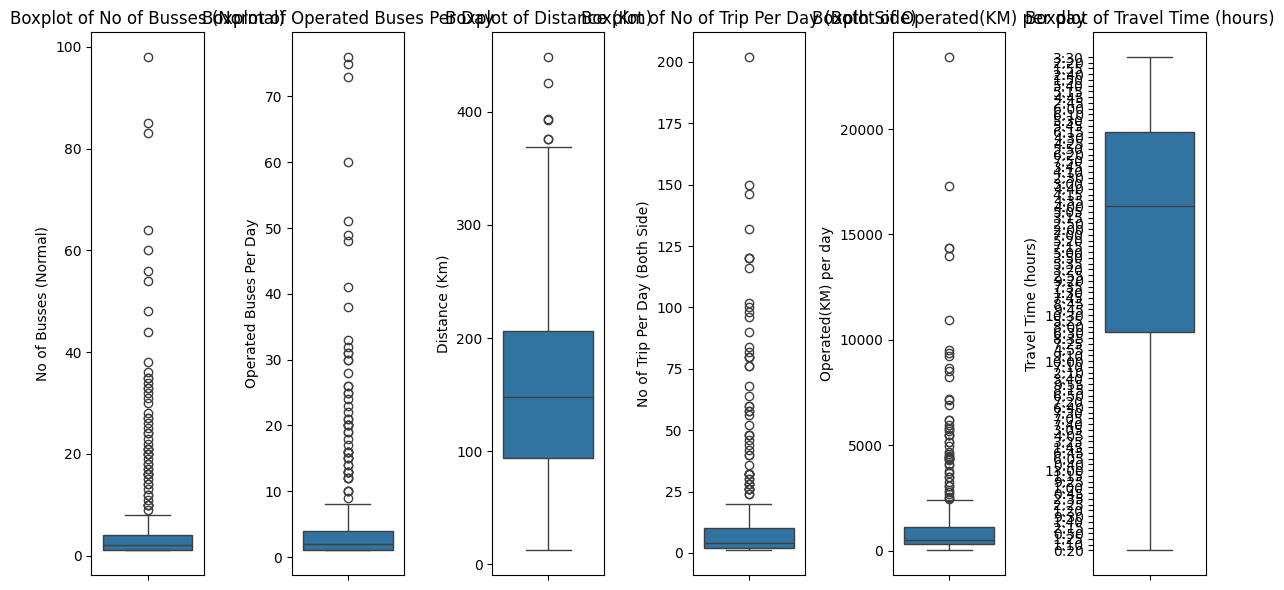

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to check outliers
columns_to_check = ['No of Busses (Normal)', 'Operated Buses Per Day',
                    'Distance (Km)', 'No of Trip Per Day (Both Side)',
                    'Operated(KM) per day', 'Travel Time (hours)']

# Set the figure size
plt.figure(figsize=(12, 6))

# Create boxplots
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(1, len(columns_to_check), i)
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

In [230]:
# List down dataset columns
list(df.columns)

['Serial Number',
 'Route No.',
 'Origin',
 'Destination',
 'No of Busses (Normal)',
 'Operated Buses Per Day',
 'Distance (Km)',
 'No of Trip Per Day (Both Side)',
 'Operated(KM) per day',
 'Travel Time (hours)']

## Data Preperation

In [231]:
# Capitalising letters to make sure no lowercase in Origin and	Destination columns
df['Origin'] = df['Origin'].str.upper()
df['Destination'] = df['Destination'].str.upper()

In [232]:
# Remove missing values in Travel Time (hours) column
df = df.dropna(subset=['Travel Time (hours)'])

# Identify number of missing values
df['Travel Time (hours)'].isnull().sum()

np.int64(0)

In [233]:
# Convert 'hour:min' format strings in Travel Time (hours) into float hour values

def convert_to_decimal_format(time_str):
    if pd.isnull(time_str):
        return None
    try:
        hrs, mins = map(int, time_str.split(":"))
        # Convert minutes to fractional part and keep two digits for display
        return f"{hrs}.{str(int((mins / 60) * 100)).zfill(2)}"
    except:
        return time_str  # Keep original if not in expected format

df['Travel Time (hours)'] = df['Travel Time (hours)'].apply(convert_to_decimal_format)
df.head()

<ipython-input-233-736662c20d9d>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Serial Number,Route No.,Origin,Destination,No of Busses (Normal),Operated Buses Per Day,Distance (Km),No of Trip Per Day (Both Side),Operated(KM) per day,Travel Time (hours)
0,1,1,COLOMBO,KANDY,98,75,115.2,150,17280.0,3.50
1,2,1 - 1,COLOMBO,KEGALLE,33,31,77.3,80,6184.0,2.33
2,3,1 - 1/245,KEGALLE,NEGOMBO,1,1,74.0,4,296.0,1.91
3,4,1 - 2,COLOMBO,MAWANELLA,12,12,90.0,48,4320.0,2.66
4,5,1 - 3,COLOMBO,WARAKAPOLA,2,2,56.2,4,224.8,1.83


In [234]:
# Change data type
df['No of Busses (Normal)'] = df['No of Busses (Normal)'].astype(float)

<ipython-input-234-81dc96faf83a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [235]:
# Find outliers with a function

def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers = df[((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR)))]
  return outliers

In [236]:
# Find outliers for age column
NBN_outliers = find_outliers_IQR(df['No of Busses (Normal)'])
print("No of Busses (Normal) outliers before fix: " + str(len(NBN_outliers)))
NBN_outliers

No of Busses (Normal) outliers before fix: 55


,No of Busses (Normal)
0,98.0
1,33.0
3,12.0
6,17.0
9,83.0
10,64.0
11,25.0
22,16.0
29,22.0
32,54.0


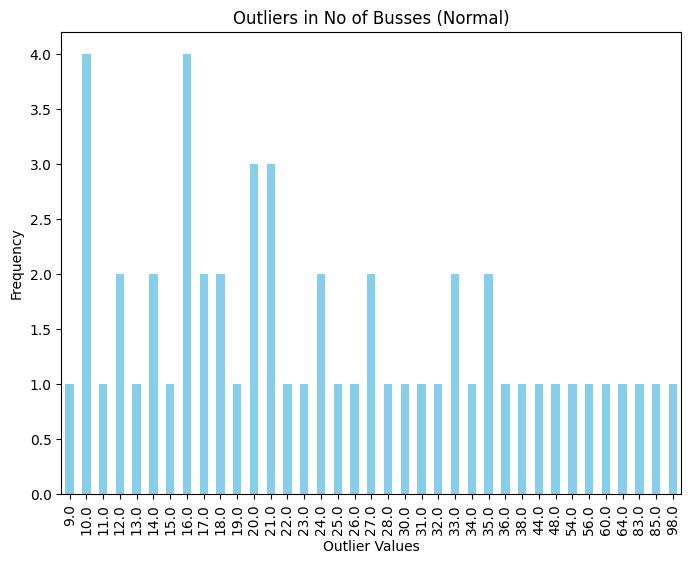

In [237]:
# Sort outliers in ascending order
sorted_outliers = NBN_outliers.sort_values()

# Plot the bar chart for outliers
plt.figure(figsize=(8, 6))
sorted_outliers.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Outliers in No of Busses (Normal)')
plt.xlabel('Outlier Values')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [238]:
# Find outliers for age column
OBPD_outliers = find_outliers_IQR(df['Operated Buses Per Day'])
print("Operated Buses Per Day outliers before fix: " + str(len(OBPD_outliers)))
OBPD_outliers

Operated Buses Per Day outliers before fix: 53


,Operated Buses Per Day
0,75
1,31
3,12
6,16
9,73
10,60
11,21
22,13
29,20
32,48


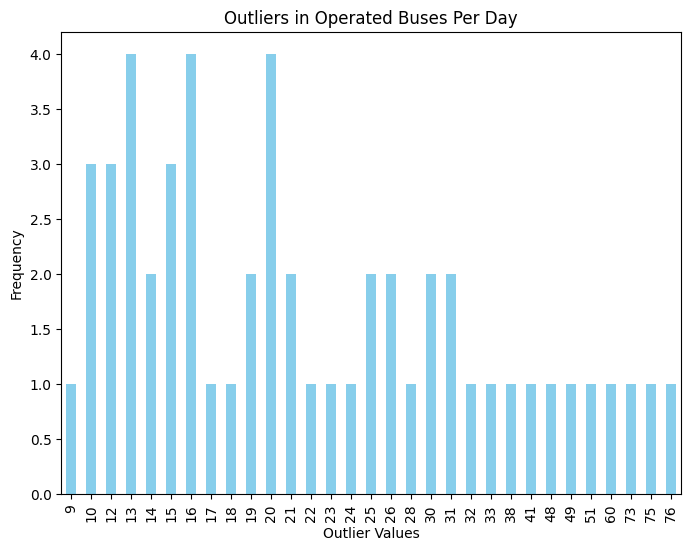

In [239]:
# Sort outliers in ascending order
sorted_outliers = OBPD_outliers.sort_values()

# Plot the bar chart for outliers
plt.figure(figsize=(8, 6))
sorted_outliers.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Outliers in Operated Buses Per Day')
plt.xlabel('Outlier Values')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [240]:
# Find outliers for age column
D_outliers = find_outliers_IQR(df['Distance (Km)'])
print("Distance (Km) outliers before fix: " + str(len(D_outliers)))
D_outliers

Distance (Km) outliers before fix: 6


,Distance (Km)
92,425.1
107,376.3
109,394.0
145,392.5
199,376.2
230,448.5


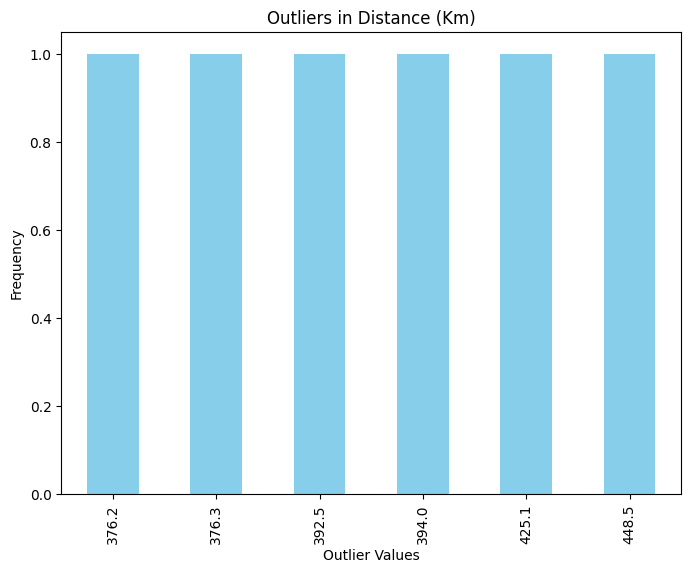

In [241]:
# Sort outliers in ascending order
sorted_outliers = D_outliers.sort_values()

# Plot the bar chart for outliers
plt.figure(figsize=(8, 6))
sorted_outliers.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Outliers in Distance (Km)')
plt.xlabel('Outlier Values')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [242]:
# Find outliers for age column
outliers = find_outliers_IQR(df['No of Trip Per Day (Both Side)'])
print("No of Trip Per Day (Both Side) outliers before fix: " + str(len(outliers)))
outliers

No of Trip Per Day (Both Side) outliers before fix: 53


,No of Trip Per Day (Both Side)
0,150
1,80
3,48
6,32
9,146
10,120
11,84
22,26
29,40
32,132


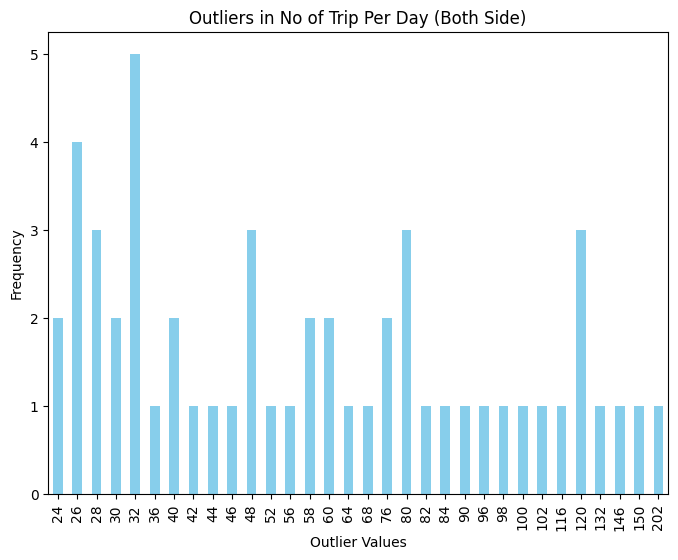

In [243]:
# Sort outliers in ascending order
sorted_outliers = outliers.sort_values()

# Plot the bar chart for outliers
plt.figure(figsize=(8, 6))
sorted_outliers.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Outliers in No of Trip Per Day (Both Side)')
plt.xlabel('Outlier Values')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [244]:
# Find outliers for age column
OPD_outliers = find_outliers_IQR(df['Operated(KM) per day'])
print("Operated(KM) per day outliers before fix: " + str(len(OPD_outliers)))
NBN_outliers

Operated(KM) per day outliers before fix: 48


,No of Busses (Normal)
0,98.0
1,33.0
3,12.0
6,17.0
9,83.0
10,64.0
11,25.0
22,16.0
29,22.0
32,54.0


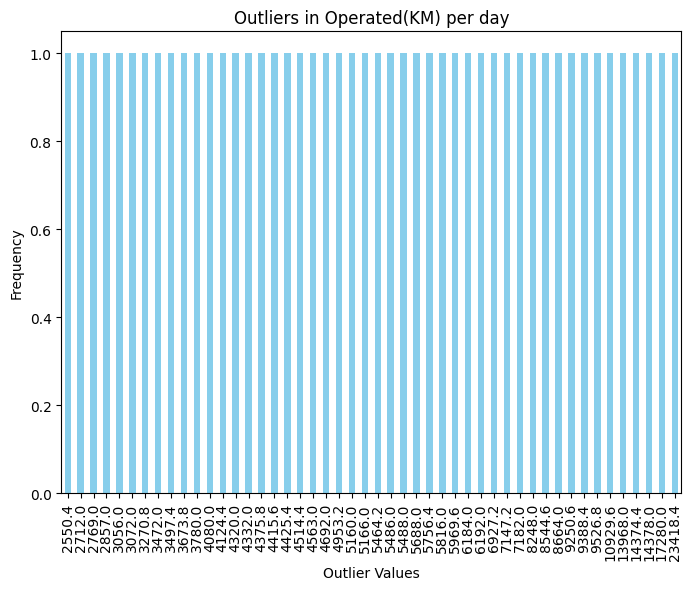

In [245]:
# Sort outliers in ascending order
sorted_outliers = OPD_outliers.sort_values()

# Plot the bar chart for outliers
plt.figure(figsize=(8, 6))
sorted_outliers.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Outliers in Operated(KM) per day')
plt.xlabel('Outlier Values')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Since there's no negative values, let's just keep all outlier values.

In [246]:
# Save cleaned dataframe to csv
try:
  df.to_csv('cleaned_dataset.csv', index=False)
  print('cleaned_dataset.csv saved successfully')
except Exception as e:
  print(f"An error occurred: {e}")

cleaned_dataset.csv saved successfully
